#Importing Libraries

In [692]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Loading the dataset

In [693]:
df = pd.read_csv("/content/task_ai21.csv")

#Exploring the data

In [694]:
df.shape

(2000, 22)

In [695]:
df.info()
# Here we can understand column names, missing values in them and their dtypes
# Also i am pretty sure it is a good practice to delete the "unnamed" column. I will
# Do it later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       2000 non-null   int64 
 1   battery_power    2000 non-null   int64 
 2   clock_speed      1892 non-null   object
 3   dual_sim         2000 non-null   int64 
 4   four_g           1890 non-null   object
 5   px_height        2000 non-null   int64 
 6   px_width         2000 non-null   int64 
 7   ram              2000 non-null   int64 
 8   talk_time        1893 non-null   object
 9   three_g          2000 non-null   int64 
 10  touch_screen     1890 non-null   object
 11  wifi             2000 non-null   int64 
 12  price_range      1892 non-null   object
 13  bluetooth        2000 non-null   int64 
 14  front_camera     1892 non-null   object
 15  memory           1895 non-null   object
 16  mobile_depth     1891 non-null   object
 17  mobile_weight    2000 non-null   

In [696]:
df.describe()
# here we can see some info about quartiles
# Dual sim - data is not skewed because q2 = 1 so 50% of data is 0, 50% is 1
# Three g - data is skewed. mostly phones have 3g
# some basic analysis(like the ones above) can be done to all the columns
# we can notice that tehere are no outliers

,Unnamed: 0,battery_power,dual_sim,px_height,px_width,ram,three_g,wifi,bluetooth,mobile_weight,number_of_cores,screen_height
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000
mean,999.500000,1238.518500,0.509500,645.108000,1251.515500,2124.213000,0.761500,0.507000,0.4950,140.249000,4.520500,12.306500
std,577.494589,439.418206,0.500035,443.780811,432.199447,1084.732044,0.426273,0.500076,0.5001,35.399655,2.287837,4.213245
min,0.000000,501.000000,0.000000,0.000000,500.000000,256.000000,0.000000,0.000000,0.0000,80.000000,1.000000,5.000000
25%,499.750000,851.750000,0.000000,282.750000,874.750000,1207.500000,1.000000,0.000000,0.0000,109.000000,3.000000,9.000000
50%,999.500000,1226.000000,1.000000,564.000000,1247.000000,2146.500000,1.000000,1.000000,0.0000,141.000000,4.000000,12.000000
75%,1499.250000,1615.250000,1.000000,947.250000,1633.000000,3064.500000,1.000000,1.000000,1.0000,170.000000,7.000000,16.000000
max,1999.000000,1998.000000,1.000000,1960.000000,1998.000000,3998.000000,1.000000,1.000000,1.0000,200.000000,8.000000,19.000000


In [697]:
df.head(10)

,Unnamed: 0,battery_power,clock_speed,dual_sim,four_g,px_height,px_width,ram,talk_time,three_g,...,price_range,bluetooth,front_camera,memory,mobile_depth,mobile_weight,number_of_cores,camera_pixels,screen_height,screen_width
0,0,842,2.2,0,0.0,20,756,2549,19.0,0,...,0.0,0,1.0,7.0,0.6,188,2,2.0,9,_
1,1,1021,0.5,1,1.0,905,1988,2631,7.0,1,...,1.0,1,0.0,53.0,0.7,136,3,6.0,17,3.0
2,2,563,0.5,1,1.0,1263,1716,2603,9.0,1,...,1.0,1,2.0,41.0,0.9,145,5,6.0,11,2.0
3,3,615,2.5,0,0.0,1216,1786,2769,11.0,1,...,1.0,1,0.0,10.0,0.8,131,6,9.0,16,8.0
4,4,1821,1.2,0,NaN,1208,1212,1411,15.0,1,...,0.0,1,13.0,44.0,@,141,2,14.0,8,2.0
5,5,1859,0.5,1,0.0,1004,1654,1067,10.0,1,...,0.0,0,3.0,22.0,0.7,164,1,7.0,17,1.0
6,6,1821,1.7,0,1.0,381,1018,3220,18.0,1,...,1.0,0,4.0,10.0,0.8,139,8,10.0,13,NaN
7,7,1954,0.5,1,0.0,512,1149,700,5.0,1,...,0.0,0,0.0,_,0.8,187,4,0.0,16,3.0
8,8,1445,0.5,0,0.0,386,836,1099,20.0,1,...,0.0,1,0.0,53.0,0.7,174,7,14.0,17,1.0
9,9,509,0.6,1,1.0,1137,1224,513,12.0,1,...,0.0,1,2.0,9.0,0.1,93,5,15.0,19,10.0


#EDA

checking nulls

In [698]:
df.isnull().sum()

,0
Unnamed: 0,0
battery_power,0
clock_speed,108
dual_sim,0
four_g,110
px_height,0
px_width,0
ram,0
talk_time,107
three_g,0


checking unique values

In [726]:
for element in df:
  print(element)
  print(df[element].unique())

battery_power
[ 842 1021  563 ... 1784 1139  858]
clock_speed
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  1.1 0.  1.4 1.6 0.9 2.7 1.3 2.3
 1.8 3.  1.5 1.9 2.  2.6 2.4 0.8 0.7]
dual_sim
[0 1]
four_g
[0. 1.]
px_height
[  20  905 1263 ...  528  915  483]
px_width
[ 756 1988 1716 ...  743 1890 1632]
ram
[2549 2631 2603 ... 2032 3057 3919]
talk_time
[19.  7.  9. 11. 15. 10. 18.  5. 20. 12. 13.  2.  4.  3. 16.  6. 14.  8.
 17.]
three_g
[0 1]
touch_screen
[0 1]
wifi
[1 0]
price_range
[0. 1.]
bluetooth
[0 1]
front_camera
[ 1.  0.  2. 13.  3.  4.  5.  7. 11. 12. 16.  6. 15.  8. 10. 18.  9. 17.
 14. 19.]
memory
[ 7. 53. 41. 10. 44. 22. 14.  9. 33. 17. 52. 46. 49. 19. 39. 13. 47. 38.
  8. 57. 51. 21.  5. 60. 61.  6. 11. 50. 34. 20. 27. 42. 63. 43. 16. 12.
 55. 30. 45. 29. 58. 64. 25. 54. 15. 23. 37. 31. 32.  4. 18. 40. 36.  2.
 56. 26.  3. 24. 48. 28. 62. 59. 35.]
mobile_depth
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
mobile_weight
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 101 121

#Data cleaning

working with features

dropping and dealing with missing values

In [700]:
# after a brief analysis we understhod that some changed need to be done

df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.clock_speed =pd.to_numeric(df.clock_speed, errors ='coerce').fillna(0).astype('float')

df.four_g =pd.to_numeric(df.four_g, errors ='coerce').fillna(1).astype('float') # i will fill nulls with 1
# so my model predicts prices higher, so people do not complain about false low predictions

df.talk_time =pd.to_numeric(df.talk_time, errors ='coerce').astype('float')

mode_talk_time = df['talk_time'].mode()[0]
df.talk_time =pd.to_numeric(df.talk_time, errors ='coerce').fillna(mode_talk_time).astype('float')

df.touch_screen =pd.to_numeric(df.touch_screen, errors ='coerce').fillna(1).astype('int') # filling nulls with 1 just in case. our model rather predict higher price

df.front_camera =pd.to_numeric(df.front_camera, errors ='coerce').fillna(11).astype('float')

memory_mode = df['memory'].mode()[0]
df.memory =pd.to_numeric(df.memory, errors ='coerce').fillna(memory_mode).astype('float')

mobile_mode = df['mobile_depth'].mode()[0]
df.mobile_depth =pd.to_numeric(df.mobile_depth, errors ='coerce').fillna(mobile_mode).astype('float')

camera_mode = df['camera_pixels'].mode()[0]
df.camera_pixels =pd.to_numeric(df.camera_pixels, errors ='coerce').fillna(camera_mode).astype('float')

screen_width_mode = df['screen_width'].mode()[0]
df.screen_width =pd.to_numeric(df.screen_width, errors ='coerce').fillna(screen_width_mode).astype('float')

mode_px = df["px_height"].mode()[0]
df.loc[df["px_height"] == 0, "px_height"] = mode_px

working with target feature

In [701]:
df.price_range = pd.to_numeric(df.price_range, errors ='coerce')
# there is no way to fill nulls. we just need to swap garbage lik "@"
# with nulls to easily delete it later

# why isnt it possible to fill the values? becaue this is our TARGET feature
# we need 100% accurate info in that, not predicted possibilities

Lets see our result

In [728]:
df.info()
# all columns are numeric and have no missing values except for our target

<class 'pandas.core.frame.DataFrame'>
Index: 1842 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   battery_power    1842 non-null   int64  
 1   clock_speed      1842 non-null   float64
 2   dual_sim         1842 non-null   int64  
 3   four_g           1842 non-null   float64
 4   px_height        1842 non-null   int64  
 5   px_width         1842 non-null   int64  
 6   ram              1842 non-null   int64  
 7   talk_time        1842 non-null   float64
 8   three_g          1842 non-null   int64  
 9   touch_screen     1842 non-null   int64  
 10  wifi             1842 non-null   int64  
 11  price_range      1842 non-null   float64
 12  bluetooth        1842 non-null   int64  
 13  front_camera     1842 non-null   float64
 14  memory           1842 non-null   float64
 15  mobile_depth     1842 non-null   float64
 16  mobile_weight    1842 non-null   int64  
 17  number_of_cores  18

#Visualizations

heatmap

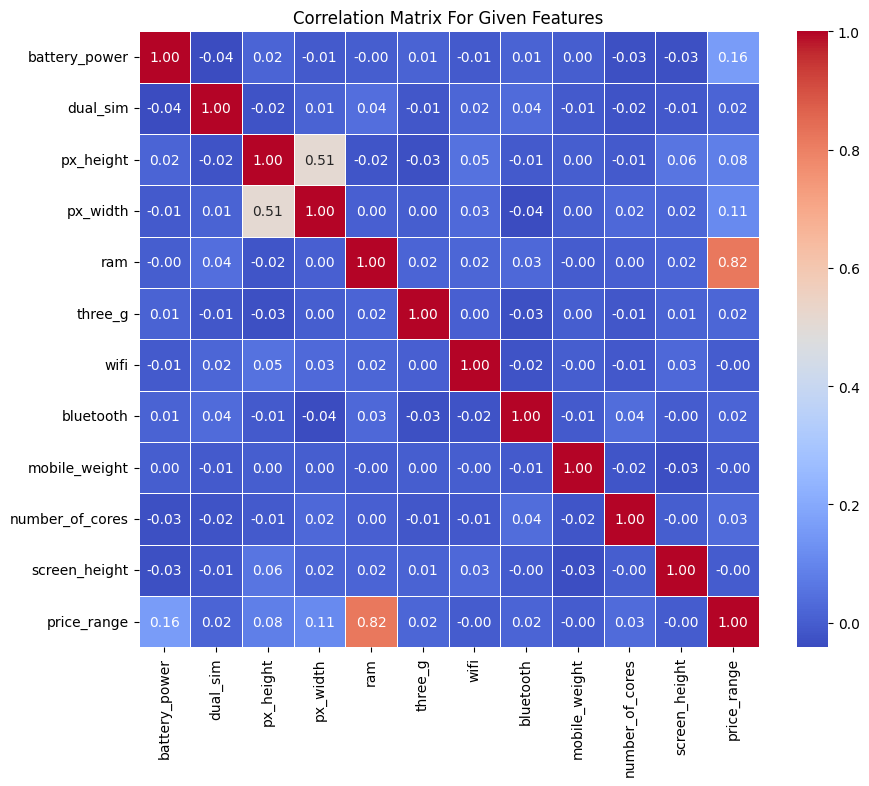

In [703]:
features_used = ["battery_power", "dual_sim", "px_height", "px_width", 'ram', 'three_g', 'wifi', 'bluetooth', "mobile_weight", 'number_of_cores', 'screen_height', "price_range"]
# Only those features that were originaly numeric can be used
# not all features are going to be used because it will look too masy and
# nothing will be understhood
corr = df[features_used].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix For Given Features')
plt.show()

# we can see correlation betwee features. This is helpful for furure feature
# engineering (which will not be performed during this task)

# we can see corr between features and trarget. This helps us understand the
# impoprtance of the features

# correlation with target variable
# highest corr - with ram

displots

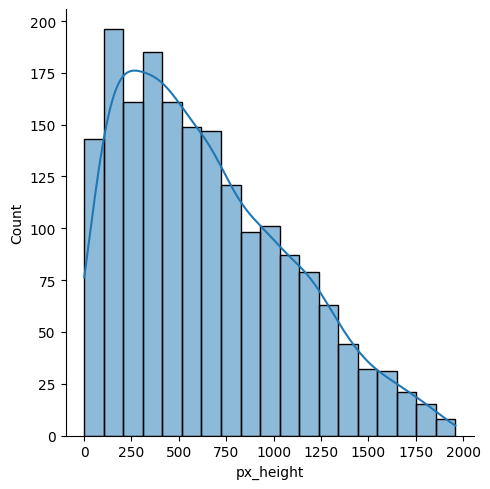

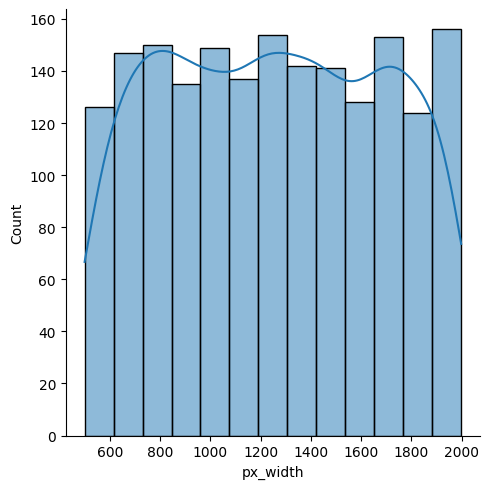

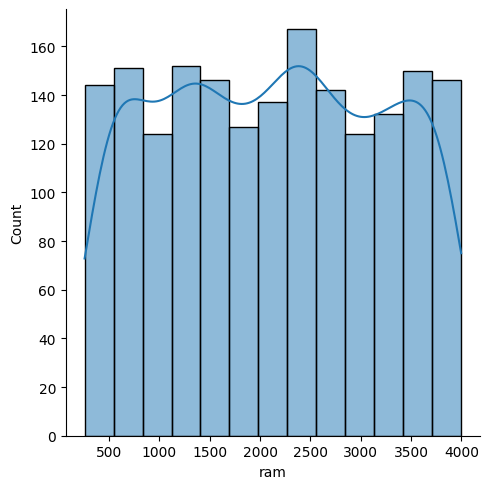

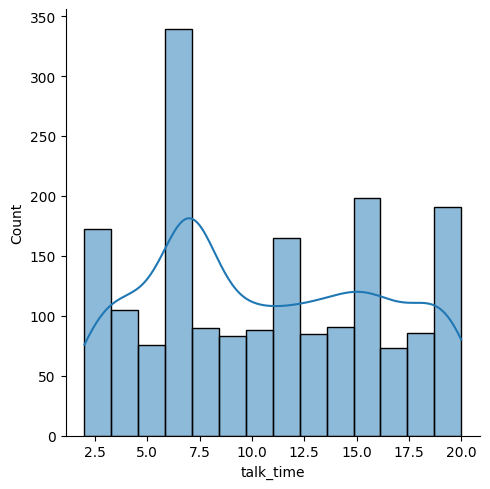

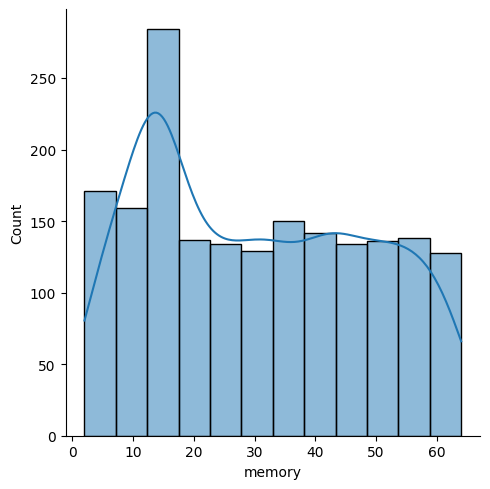

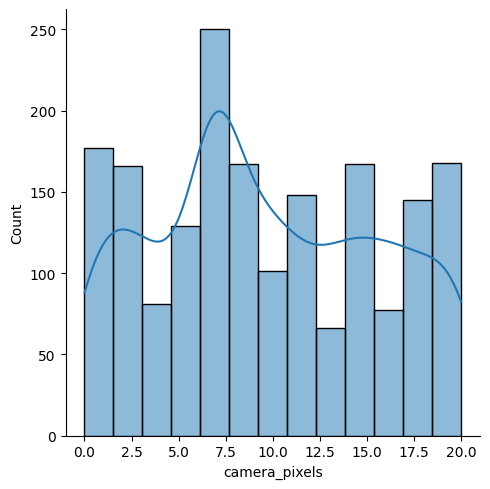

In [729]:
for i in ["px_height","px_width","ram", "talk_time","memory","camera_pixels"]:
    sns.displot(df, x=i, kde=True)

    # this did not gave much information
    # the only thing that was significantly helpful, i forgot to change
    # 0 values in pixel feight and the plot 'gave me a hint

countplots

<Axes: xlabel='dual_sim', ylabel='count'>

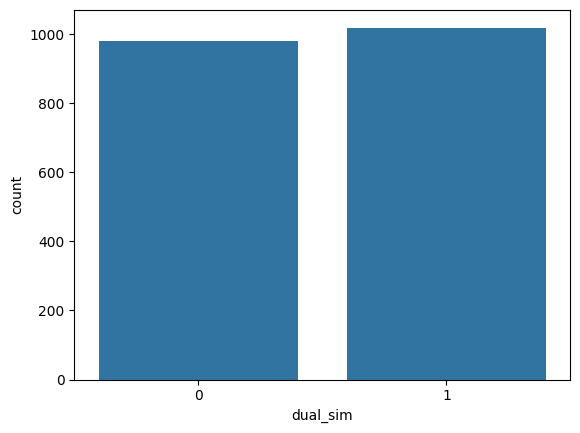

In [705]:
sns.countplot(x = 'dual_sim', data = df) # almost equally distributed. A little bit more amount has dual sim

<Axes: xlabel='four_g', ylabel='count'>

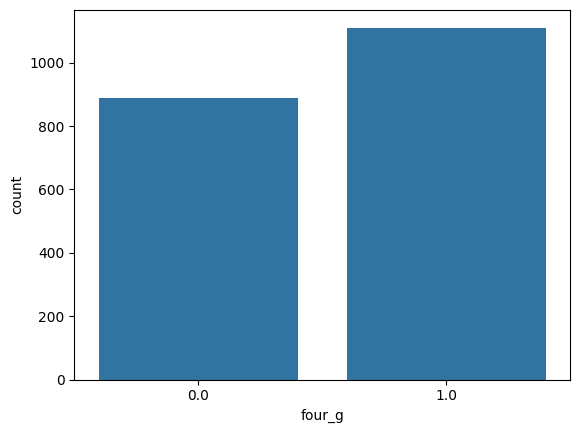

In [706]:
sns.countplot(x = 'four_g', data = df) # more phones have 4g

<Axes: xlabel='touch_screen', ylabel='count'>

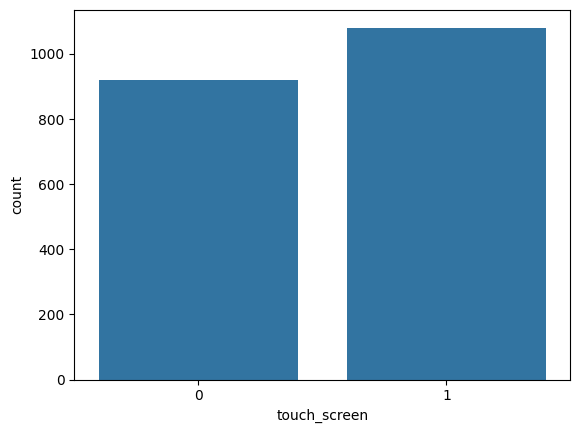

In [707]:
sns.countplot(x = 'touch_screen', data = df) # more phones do have touch screen

<Axes: xlabel='wifi', ylabel='count'>

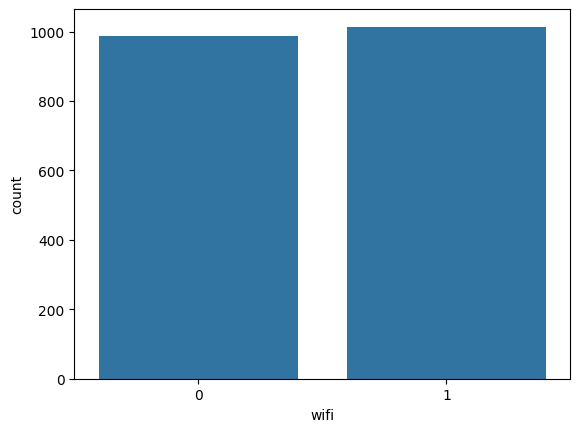

In [708]:
sns.countplot(x = 'wifi', data = df) # almost equally, most have wifi

<Axes: xlabel='bluetooth', ylabel='count'>

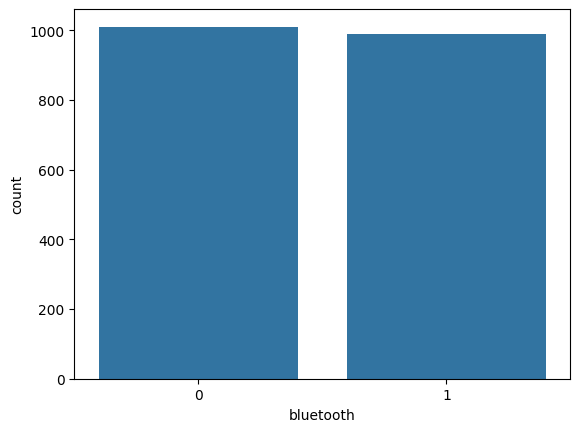

In [709]:
sns.countplot(x = 'bluetooth', data = df)

<Axes: xlabel='price_range', ylabel='count'>

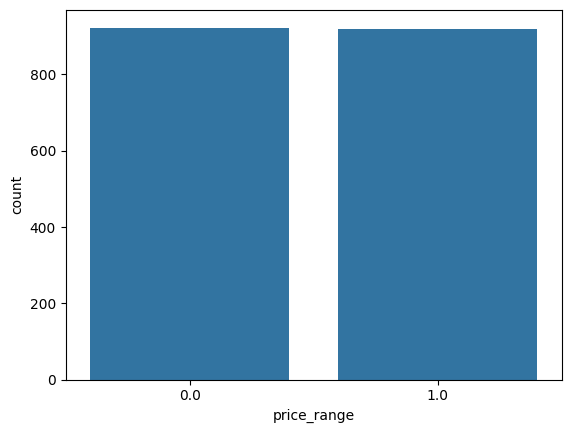

In [710]:
sns.countplot(x = "price_range", data = df)

visualizing the relationship

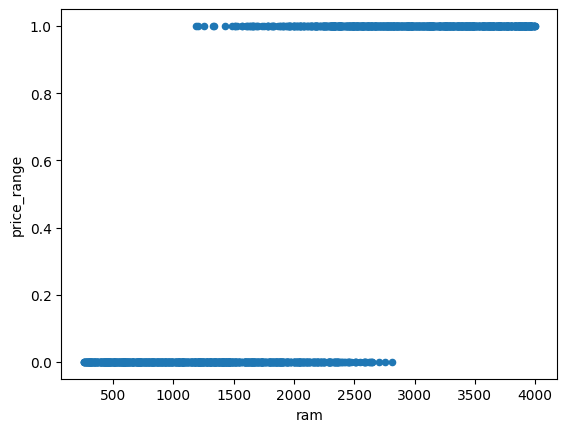

In [711]:
df.plot.scatter(x='ram', y='price_range')
plt.show()
# bad ram = low price (we saw that in corr matrix as well)

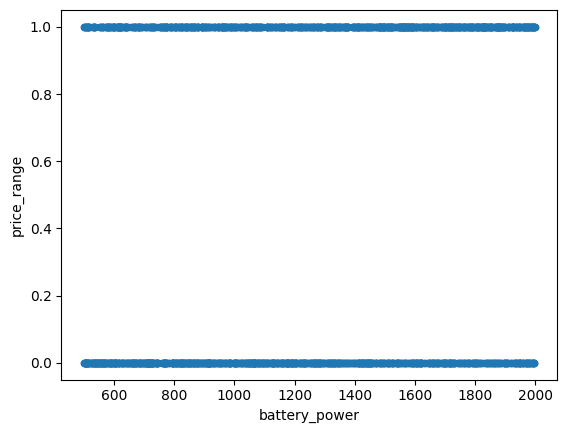

In [712]:
df.plot.scatter(x='battery_power', y='price_range')
plt.show()
# there exist phones in different price range with different battery power

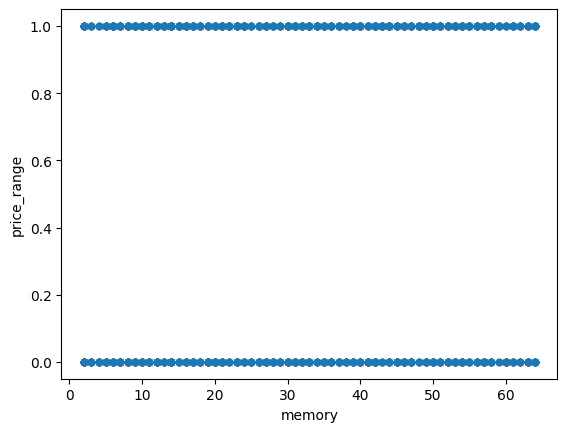

In [713]:
df.plot.scatter(x='memory', y='price_range')
plt.show()
# there exist phones in different price range with different memory

#Feature Selection


some work before starting

In [714]:
df = df.dropna(how='any',axis=0)
# because we cannot fill nulls in our target variable the only thing left to do is to drop
# the rows where we have nulls

# we can do how = 'any' because we have nulls only in the target variable

In [715]:
X = df.drop(['price_range'], axis=1)
y = df['price_range']

#Train-Test Split

In [716]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Model Training

logistic regression

In [717]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

accuracy_lr_test = accuracy_score(y_test, y_pred_lr)
precision_lr_test = precision_score(y_test, y_pred_lr)
recall_lr_test = recall_score(y_test, y_pred_lr)
f1_lr_test = f1_score(y_test, y_pred_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ranndom forest

In [718]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf_test = accuracy_score(y_test, y_pred_rf)
precision_rf_test = precision_score(y_test, y_pred_rf)
recall_rf_test = recall_score(y_test, y_pred_rf)
f1_rf_test = f1_score(y_test, y_pred_rf)

xgboost

In [719]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb_test = accuracy_score(y_test, y_pred_xgb)
precision_xgb_test = precision_score(y_test, y_pred_xgb)
recall_xgb_test = recall_score(y_test, y_pred_xgb)
f1_xgb_test = f1_score(y_test, y_pred_xgb)

# Evaluation

accuracy, precision, recall, f1 score

In [720]:
print('Logistic Regression')
print(f"accuracy: {accuracy_lr_test}\nprecision: {precision_lr_test}\nrecall: {recall_lr_test}\nf1 score: {f1_lr_test}")
print("\nranndom forest")
print(f"accuracy: {accuracy_rf_test}\nprecision: {precision_rf_test}\nrecall: {recall_rf_test}\nf1 score: {f1_rf_test}")
print("\nxgboost")
print(f"accuracy: {accuracy_xgb_test}\nprecision: {precision_xgb_test}\nrecall: {recall_xgb_test}\nf1 score: {f1_xgb_test}")

# it is evident that xgboost is the best model. every metric we checked (accuracy, precision, recall, f1 score) are the
# highest in xgboost

Logistic Regression
accuracy: 0.8834688346883469
precision: 0.855
recall: 0.9243243243243243
f1 score: 0.8883116883116883

ranndom forest
accuracy: 0.962059620596206
precision: 0.9572192513368984
recall: 0.9675675675675676
f1 score: 0.9623655913978495

xgboost
accuracy: 0.989159891598916
precision: 0.983957219251337
recall: 0.9945945945945946
f1 score: 0.989247311827957


roc/auc curve

In [721]:
# We need to observe roc/auc curve as well

roc_auc_linear = roc_auc_score(y_test, y_pred_lr)
print(f"ROC-AUC linear: {roc_auc_linear:.4f}")

roc_auc_randomforest = roc_auc_score(y_test, y_pred_rf)
print(f"ROC-AUC random forest: {roc_auc_randomforest:.4f}")

roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)
print(f"ROC-AUC xgb: {roc_auc_xgb:.4f}")

# The ROC - AUC score is the highest for XGBoost as well. So it certanly is the best model

ROC-AUC linear: 0.8834
ROC-AUC random forest: 0.9620
ROC-AUC xgb: 0.9891


#Plotting Confusion Matrix

Linear regression


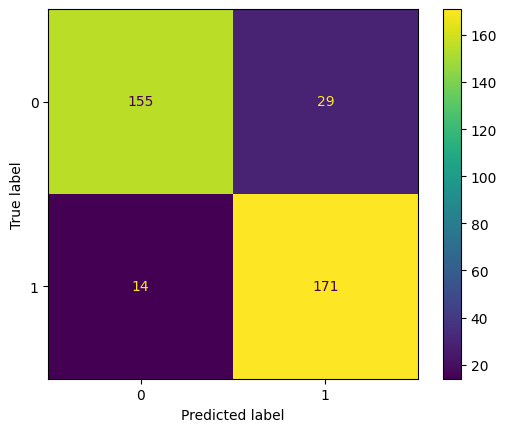

Random Forest


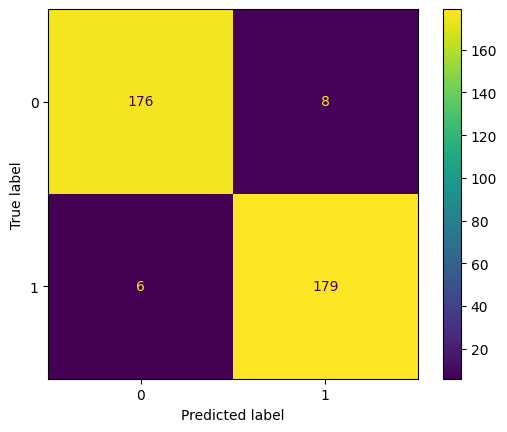

XGBoost


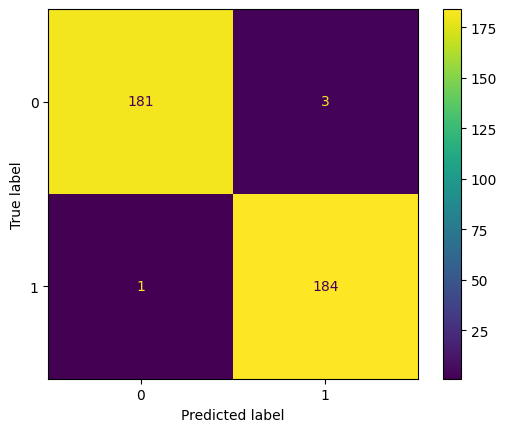

In [722]:
print("Linear regression")

actual = y_test
predicted = y_pred_lr
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()


print("Random Forest")

actual = y_test
predicted = y_pred_rf
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()


print("XGBoost")

actual = y_test
predicted = y_pred_xgb
confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

#Plotting ROC curve

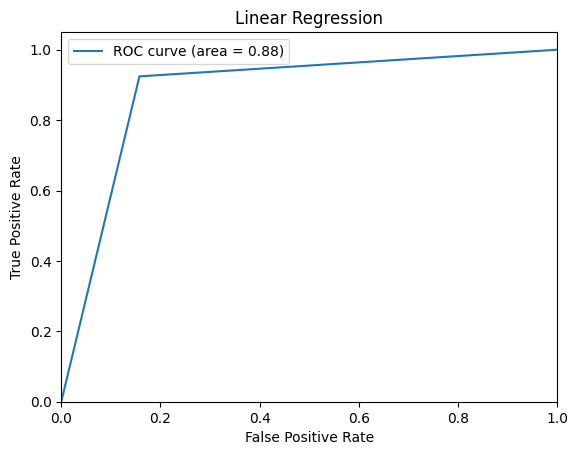

In [723]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Linear Regression")
plt.legend()
plt.show()
# the angle should be as close to 90 degree as possible

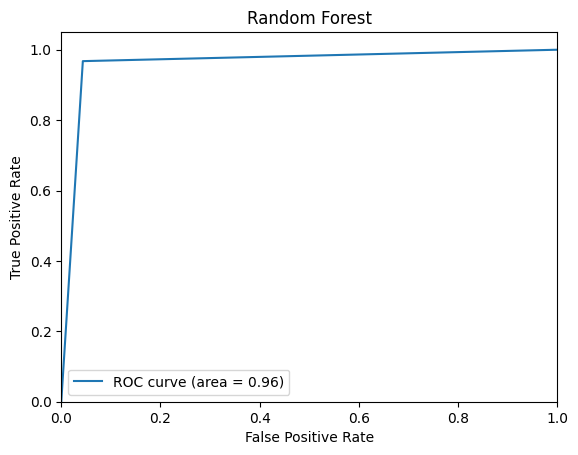

In [724]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Random Forest")
plt.legend()
plt.show()
# Better result than above

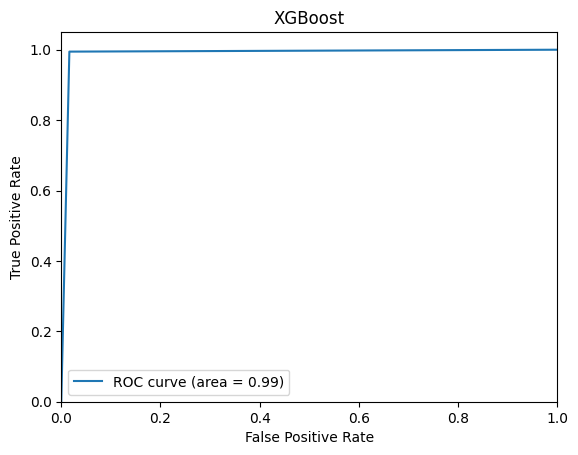

In [725]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("XGBoost")
plt.legend()
plt.show()
# Almost 90 degree. the best result

# Final Analysis

XGBoost is the best model for our task. It has the highest accuracy, f1 score, it's roc/auc curve is the best. So if a decision should be made what model to choose it definetely is **XGBoost**